In [187]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:15pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:15pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
"""))

# 1. tensorflow v2.xx에서 v1사용하기

In [188]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()  # v2를 비활성화하고 v1활성화
import numpy as np
import pandas as pd

## Tensorflow
- 데이터 흐름 그래프(tensor객체의 흐름)
- 이 그래프는 node(상수, 변수, 연산)와 edge로 구성
- sess = tf.Session()으로 실행
- sess.run()을 통해 값을 확인

In [189]:
# tensor = data(상수, 변수)와 연산
node1 = tf.constant('Hello, Tensorflow')
sess = tf.Session()
print(sess.run(node1))

b'Hello, Tensorflow'


In [190]:
# 간단한 연산 tensor 그래프
node1 = tf.constant(10, dtype=tf.float16)
node2 = tf.constant(20, dtype=tf.float16)
node3 = tf.add(node1, node2)
sess = tf.Session()
print(sess.run([node1, node2, node3]))

[10.0, 20.0, 30.0]


In [191]:
# 타입 변경
node1 = tf.constant(np.array([1,2,3]), dtype=tf.int16)
node2 = tf.cast(node1, dtype=tf.float32)
sess = tf.Session()
sess.run([node1, node2])

[array([1, 2, 3], dtype=int16), array([1., 2., 3.], dtype=float32)]

In [192]:
# 평균값 계산 : tf.reduce_mean()
data = np.array([1., 2., 3.])
tensor = tf.reduce_mean(data)
sess = tf.Session()
sess.run(tensor)

2.0

In [193]:
# 랜덤값을 갖는 tensor
a = tf.random_normal([2]) # 평균0, 표준편차가 1인 난수 실수 2개(정규분포이루는난수)
b = tf.random_normal([1])
sess = tf.Session()
sess.run([a,b])

[array([-1.7819357, -1.0772797], dtype=float32),
 array([1.0381477], dtype=float32)]

In [194]:
w = tf.Variable(tf.random.normal([1]))
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # w변수의 난수 초기화
sess.run(w)

array([0.05280958], dtype=float32)

# 2. tensorflow v1을 이용한 linear regression을 구현
## 2.1 입력(독립)변수 x가 1개, 타겟(종속)변수 y가 1개

In [195]:
x = np.array([1,2,3])
y = np.array([2,3,4])
# weight오 bias(처음엔 랜덤값으로 셋팅, 학습과정에서 변경)
W = tf.Variable(tf.random.normal([1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')
# Hypothesis : 예측값
H = W*x + b
#cost function(손실함수 = mse;최소제곱법)
cost = tf.reduce_mean(tf.square(H-y))
'''
학습목적 : cost가 최소가 되는 W, b를 찾아내는 것
cost는 2차함수이므로 곡선그래프. 곡선위 미분값이 줄어드는 방향으로 학습(경사하강)
=> GradientDescentOptimizer
'''
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)
# Session 생성
sess = tf.Session()
# W, b 변수 노드에 초기화
sess.run(tf.global_variables_initializer())
# 5000번 학습 (v2에서는 fit함수)
for step in range(5001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b])
    if step%200 == 0:
        print("{}번째 cost:{}, W:{}, b:{}".format(step,
                                               cost_val,
                                               W_val,
                                               b_val))

0번째 cost:0.3873696029186249, W:[0.77096194], b:[0.93725693]
200번째 cost:5.5827451433287933e-05, W:[0.9913427], b:[1.0196798]
400번째 cost:2.131782821379602e-05, W:[0.99465036], b:[1.0121609]
600번째 cost:8.140185855154414e-06, W:[0.99669427], b:[1.0075148]
800번째 cost:3.1083702651812928e-06, W:[0.9979573], b:[1.0046436]
1000번째 cost:1.1872169807247701e-06, W:[0.9987375], b:[1.0028698]
1200번째 cost:4.535513653536327e-07, W:[0.9992198], b:[1.0017737]
1400번째 cost:1.734109815743068e-07, W:[0.99951756], b:[1.0010967]
1600번째 cost:6.632454585542291e-08, W:[0.9997013], b:[1.0006783]
1800번째 cost:2.5426771799175185e-08, W:[0.9998153], b:[1.00042]
2000번째 cost:9.864446148810657e-09, W:[0.99988496], b:[1.0002618]
2200번째 cost:3.851392538223308e-09, W:[0.99992824], b:[1.0001637]
2400번째 cost:1.5409966636070749e-09, W:[0.99995476], b:[1.0001034]
2600번째 cost:6.1482791080536e-10, W:[0.9999716], b:[1.0000653]
2800번째 cost:2.4928681341407355e-10, W:[0.9999819], b:[1.0000415]
3000번째 cost:8.733517381509515e-11, W:[0.

In [196]:
# 최종적으로 나온 회귀식 : H = W*x + b
sess.run([W, b])

[array([0.9999891], dtype=float32), array([1.0000248], dtype=float32)]

In [197]:
W_, b_ = sess.run([W, b])
W_[0], b_[0]

(0.9999891, 1.0000248)

In [198]:
def predict(x):
    return W_[0]*x + b_[0]

In [199]:
input_x = int(input('입력값은 ?'))
print('예측값은 ', predict(input_x))

입력값은 ?


ValueError: invalid literal for int() with base 10: ''

## 2.2 predict를 위한 placeholder이용
- placeholder : 텐서플로우 외부에서 데이터를 입력받는 노드

In [200]:
# x = np.array([1,2,3])
x = tf.placeholder(tf.float16)
H = 1*x + 1
sess = tf.Session()
sess.run(H, feed_dict={x:5})
sess.run(H, feed_dict={x:np.array([1,2,3])})

array([2., 3., 4.], dtype=float16)

In [201]:
# H = 2x+1
x_data = np.array([1,2,3,5,8])
y_data = np.array([3,5,7,11,17])
# tensor 그래프
# placeholder 설정 (입력변수 x, 타겟변수 y)
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
# W, b
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))
# Hypothesis(예측값)
H = W*x + b
# 손실함수
cost = tf.reduce_mean(tf.square(H-y))
# 경사하강법
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
# Session 객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # W, b 초기화
# 5000번 학습
for step in range(5001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b], 
                                         feed_dict={x:x_data,
                                                   y:y_data})
    if step%200 == 0:
        print('{}째 : cost:{}, W:{}, b:{}'.format(step, cost_val, W_val, b_val))

0째 : cost:221.07302856445312, W:[0.03324068], b:[1.4676162]
200째 : cost:0.019402548670768738, W:[1.9526297], b:[1.2531933]
400째 : cost:0.0019083978841081262, W:[1.9851438], b:[1.0794066]
600째 : cost:0.00018771261966321617, W:[1.9953407], b:[1.0249039]
800째 : cost:1.8464703316567466e-05, W:[1.9985387], b:[1.0078106]
1000째 : cost:1.8170412658946589e-06, W:[1.9995416], b:[1.0024499]
1200째 : cost:1.7856815759387246e-07, W:[1.9998562], b:[1.0007684]
1400째 : cost:1.7569766086467098e-08, W:[1.9999548], b:[1.0002412]
1600째 : cost:1.7691036413580719e-09, W:[1.9999858], b:[1.0000762]
1800째 : cost:1.9404070017436936e-10, W:[1.9999952], b:[1.0000252]
2000째 : cost:3.470859016863059e-11, W:[1.9999979], b:[1.000011]
2200째 : cost:3.470859016863059e-11, W:[1.9999979], b:[1.000011]
2400째 : cost:3.470859016863059e-11, W:[1.9999979], b:[1.000011]
2600째 : cost:3.470859016863059e-11, W:[1.9999979], b:[1.000011]
2800째 : cost:3.470859016863059e-11, W:[1.9999979], b:[1.000011]
3000째 : cost:3.470859016863059e-1

In [202]:
# 예측하기
sess.run(H, feed_dict={x:5})

array([11.], dtype=float32)

In [203]:
sess.run(H, feed_dict={x:np.array([5, 6, 7])})

array([11.      , 12.999998, 14.999996], dtype=float32)

## 2.3 scale이 다른 데이터의 linear regression 구현(scale조정X)

In [204]:
x_data = np.array([1,2,5,8,10])
y_data = np.array([3,15,68,80,95])
# placeholder 설정 (입력변수 x, 타겟변수 y)
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
# W, b
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))
# Hypothesis(예측값)
H = W*x + b
# 손실함수
cost = tf.reduce_mean(tf.square(H-y))
# 경사하강법
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
# Session 객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # W, b 초기화
# 3000번 학습
for step in range(3001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b], 
                                         feed_dict={x:x_data,
                                                   y:y_data})
    if step%200 == 0:
        print('{}째 : cost:{}, W:{}, b:{}'.format(step, cost_val, W_val, b_val))

0째 : cost:3293.420654296875, W:[8.082293], b:[0.93029326]
200째 : cost:83.66641235351562, W:[10.198092], b:[-0.59944844]
400째 : cost:83.49919891357422, W:[10.271029], b:[-1.1394984]
600째 : cost:83.48387145996094, W:[10.293122], b:[-1.3030753]
800째 : cost:83.48246002197266, W:[10.299813], b:[-1.3526223]
1000째 : cost:83.48233795166016, W:[10.301841], b:[-1.367629]
1200째 : cost:83.48231506347656, W:[10.302454], b:[-1.3721739]
1400째 : cost:83.4822998046875, W:[10.302641], b:[-1.3735516]
1600째 : cost:83.4822998046875, W:[10.302697], b:[-1.3739678]
1800째 : cost:83.48230743408203, W:[10.302713], b:[-1.3740933]
2000째 : cost:83.48231506347656, W:[10.302718], b:[-1.3741298]
2200째 : cost:83.48233032226562, W:[10.302718], b:[-1.3741326]
2400째 : cost:83.48233032226562, W:[10.302718], b:[-1.3741326]
2600째 : cost:83.48233032226562, W:[10.302718], b:[-1.3741326]
2800째 : cost:83.48233032226562, W:[10.302718], b:[-1.3741326]
3000째 : cost:83.48233032226562, W:[10.302718], b:[-1.3741326]


In [205]:
# cost값이 멈춤 : local 최소값

## 2.4 scale이 다른 데이터의 linear regression을 구현(조정O)
### scale을 맞추기 : 모든 데이터를 일정 범위내로 조정
- normalization(정규화) : 0~1로 조정
                      X - Xmin
    normalization = ────────────
                     Xmax - Xmin
         * 위의 식을 써도 되지만 라이브러리를 씀(sklearn.preprocessing.MinMaxScaler이용)
         
- standardization(표준화) : 평균0, 표준편차1로 조정
                        X - Xmean(평균)
    standardization = ──────────────────
                          Xstd(표준편차)
          * 위의 식을 써도 되지만 라이브러리를 씀(sklearn.preprocessing.StandardScaler이용)

In [206]:
# 라이브러리를 쓰지 않고 정규화
x_data = np.array([1,2,5,8,10])
y_data = np.array([3,15,68,80,95])
scaled_x_data = (x_data - x_data.min() ) / (x_data.max() - x_data.min())
scaled_y_data = (y_data - y_data.min() ) / (y_data.max() - y_data.min())
print(scaled_x_data)
print(scaled_y_data)

[0.         0.11111111 0.44444444 0.77777778 1.        ]
[0.         0.13043478 0.70652174 0.83695652 1.        ]


In [207]:
# 라이브러리를 쓰고 정규화 (MinMaxScaler이용)
x_data = np.array([1,2,5,8,10]).reshape(-1, 1)
y_data = np.array([3,15,68,80,95]).reshape(-1,1)
# np.column_stack([x_data, y_data])
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler() # x_data를 정규화시킬 객체
# scaler_x.fit(x_data)
# scaled_x_data = scaler_x.transform(x_data)
scaled_x_data = scaler_x.fit_transform(x_data)
scaler_y = MinMaxScaler() # y_data를 정규화시킬 객체
scaled_y_data = scaler_y.fit_transform(y_data)
np.column_stack([x_data, y_data, scaled_x_data, scaled_y_data])

array([[ 1.        ,  3.        ,  0.        ,  0.        ],
       [ 2.        , 15.        ,  0.11111111,  0.13043478],
       [ 5.        , 68.        ,  0.44444444,  0.70652174],
       [ 8.        , 80.        ,  0.77777778,  0.83695652],
       [10.        , 95.        ,  1.        ,  1.        ]])

In [208]:
# placeholder 설정 (입력변수 x, 타겟변수 y)
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
# W, b
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))
# Hypothesis(예측값)
H = W*x + b
# 손실함수
cost = tf.reduce_mean(tf.square(H-y))
# 경사하강법
train = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost)
# Session 객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # W, b 초기화
# 12000번 학습
for step in range(12001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b], 
                                         feed_dict={x:scaled_x_data,
                                                   y:scaled_y_data})
    if step%600 == 0:
        print('{}째 : cost:{}, W:{}, b:{}'.format(step, cost_val, W_val, b_val))

0째 : cost:0.06943825632333755, W:[0.5366688], b:[0.11957948]
600째 : cost:0.028947550803422928, W:[0.6498197], b:[0.21022886]
1200째 : cost:0.022994384169578552, W:[0.7080888], b:[0.21309276]
1800째 : cost:0.019726816564798355, W:[0.7497829], b:[0.1985944]
2400째 : cost:0.01731787994503975, W:[0.78403103], b:[0.18218774]
3000째 : cost:0.015499569475650787, W:[0.8133622], b:[0.1670717]
3600째 : cost:0.014124898239970207, W:[0.8387664], b:[0.15373771]
4200째 : cost:0.013085502199828625, W:[0.8608341], b:[0.1421006]
4800째 : cost:0.01229961309581995, W:[0.880018], b:[0.13197225]
5400째 : cost:0.01170538179576397, W:[0.8966983], b:[0.12316289]
6000째 : cost:0.011256091296672821, W:[0.91120195], b:[0.11550239]
6600째 : cost:0.010916383005678654, W:[0.9238136], b:[0.10884109]
7200째 : cost:0.01065952330827713, W:[0.9347798], b:[0.10304884]
7800째 : cost:0.010465309023857117, W:[0.94431555], b:[0.09801225]
8400째 : cost:0.010318467393517494, W:[0.9526073], b:[0.09363268]
9000째 : cost:0.010207432322204113, 

In [209]:
# 예측 : 모델에 scale 조정된 값으로 예측=>scale 조정된 y값
scaled_input = scaler_x.transform(np.array([[2],
                                            [3]]))
print('모델 예측을 위한 입력 :', scaled_input, sep='\n')
scaled_output = sess.run(H, feed_dict={x:scaled_input})
print('모델 예측 결과 :', scaled_output, sep='\n')
print('결과 :', scaler_y.inverse_transform(scaled_output), sep='\n')

모델 예측을 위한 입력 :
[[0.11111111]
 [0.22222222]]
모델 예측 결과 :
[[0.18639114]
 [0.29572278]]
결과 :
[[20.147985]
 [30.206495]]


In [210]:
# x_data들의 예측값
scaled_y_hat = sess.run(H, feed_dict={x:scaled_x_data})
y_hat = scaler_y.inverse_transform(scaled_y_hat)

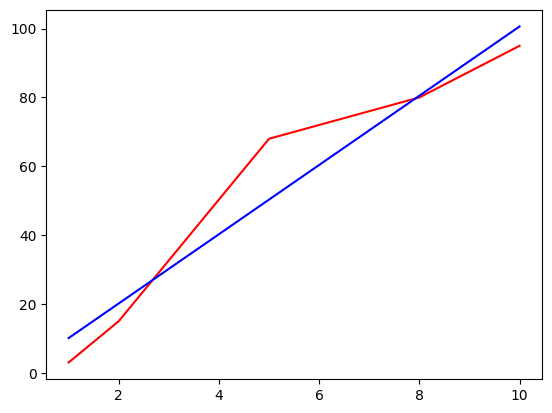

In [211]:
import matplotlib.pyplot as plt
plt.plot(x_data, y_data, 'r')
plt.plot(x_data, y_hat, 'b')

In [212]:
# 라이브러리를 쓰고 표준화 (StandardScaler이용)
x_data = np.array([1,2,5,8,10]).reshape(-1, 1)
y_data = np.array([3,15,68,80,95]).reshape(-1,1)

from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler() # x_data를 표준화할 객체
scaler_y = StandardScaler() # y_data를 표준화할 객체
scaled_x_data = scaler_x.fit_transform(x_data)
scaled_y_data = scaler_y.fit_transform(y_data)
print(np.column_stack([x_data, y_data]))
print(np.column_stack([scaled_x_data, scaled_y_data]))

[[ 1  3]
 [ 2 15]
 [ 5 68]
 [ 8 80]
 [10 95]]
[[-1.22474487 -1.34819316]
 [-0.93313895 -1.01936556]
 [-0.05832118  0.43295634]
 [ 0.81649658  0.76178394]
 [ 1.39970842  1.17281844]]


In [213]:
# placeholder 설정 (입력변수 x, 타겟변수 y)
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
# W, b
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))
# Hypothesis(예측값)
H = W*x + b
# 손실함수
cost = tf.reduce_mean(tf.square(H-y))
# 경사하강법
train = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost)
# Session 객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # W, b 초기화
# 12000번 학습
for step in range(12001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b], 
                                         feed_dict={x:scaled_x_data,
                                                   y:scaled_y_data})
    if step%600 == 0:
        print('{}째 : cost:{}, W:{}, b:{}'.format(step, cost_val, W_val, b_val))

0째 : cost:0.18342676758766174, W:[0.65870404], b:[0.15653071]
600째 : cost:0.07361280173063278, W:[0.87505853], b:[0.04708953]
1200째 : cost:0.06367462128400803, W:[0.9401447], b:[0.01416607]
1800째 : cost:0.06277520209550858, W:[0.95972484], b:[0.00426162]
2400째 : cost:0.06269379705190659, W:[0.9656152], b:[0.00128204]
3000째 : cost:0.06268642842769623, W:[0.9673874], b:[0.00038569]
3600째 : cost:0.0626857578754425, W:[0.96792036], b:[0.00011604]
4200째 : cost:0.06268569082021713, W:[0.9680804], b:[3.4915844e-05]
4800째 : cost:0.06268568336963654, W:[0.9681286], b:[1.0513219e-05]
5400째 : cost:0.06268569827079773, W:[0.96813506], b:[3.1807192e-06]
6000째 : cost:0.06268569082021713, W:[0.96813506], b:[9.75871e-07]
6600째 : cost:0.06268569827079773, W:[0.96813506], b:[3.119585e-07]
7200째 : cost:0.06268569082021713, W:[0.96813506], b:[1.15664754e-07]
7800째 : cost:0.06268568336963654, W:[0.96813506], b:[5.6365735e-08]
8400째 : cost:0.06268568336963654, W:[0.96813506], b:[4.7425686e-08]
9000째 : cost:

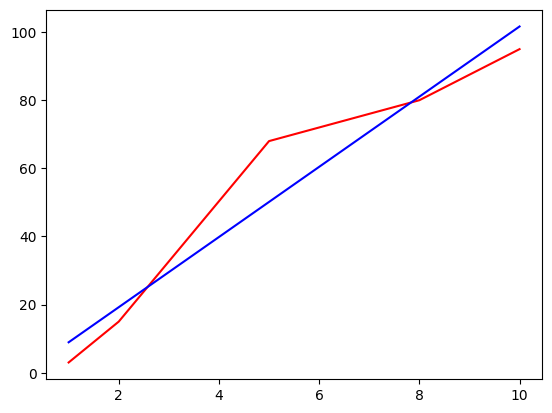

In [214]:
# x_data들의 예측값
scaled_y_hat = sess.run(H, feed_dict={x:scaled_x_data})
y_hat = scaler_y.inverse_transform(scaled_y_hat)
import matplotlib.pyplot as plt
plt.plot(x_data, y_data, 'r')
plt.plot(x_data, y_hat, 'b')

## 2.5 입력(독립)변수 x가 3개, 타겟(종속)변수 y가 1개 (csv->array)

In [215]:
# 방법1 : csv -> array
import numpy as np
#data = np.loadtxt('data/pima-indians-diabetes.csv', delimiter=',', encoding='utf-8') # 결측치, header가 없어야 함
data = np.genfromtxt('data/ozone.csv',
                    delimiter=',',
                    skip_header=1,
                    missing_values='NA',
                    filling_values=np.nan)
data[:5]

array([[ 41. , 190. ,   7.4,  67. ,   5. ,   1. ],
       [ 36. , 118. ,   8. ,  72. ,   5. ,   2. ],
       [ 12. , 149. ,  12.6,  74. ,   5. ,   3. ],
       [ 18. , 313. ,  11.5,  62. ,   5. ,   4. ],
       [  nan,   nan,  14.3,  56. ,   5. ,   5. ]])

In [216]:
# 방법2 : csv파일 -> 데이터프레임 -> 결측치처리 -> 넘파이배열 -> 머신러닝
# 1. csv를 데이터프레임으로 읽기
import pandas as pd
data = pd.read_csv('data/ozone.csv')
data.info() # Ozone, Solar.R 열에만 결측치
data.isna().sum() # 열별 결측치 갯수

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.3 KB


Ozone      37
Solar.R     7
Wind        0
Temp        0
Month       0
Day         0
dtype: int64

In [217]:
# 2. 결측치처리
# 결측치 처리 방법1 : 결측치가 있는 행을 제거
# data.dropna(how='any', axis=0, inplace=True)
# 결측치 처리 방법2 : 결측치 대체(열별 평균값으로 대체)
data.mean() # 열별평균
# data.fillna(value=data.mean(), inplace=True)
# 결측치 처리 방법3 : 결측치 대체(월별 열별 평균값으로 대체)
mean_data = data.groupby('Month')[['Ozone','Solar.R']].mean()
display(mean_data)
print('5월에 Ozone으로 대체할 값 :', mean_data.loc[5, 'Ozone'])

,Ozone,Solar.R
Month,,
5,23.615385,181.296296
6,29.444444,190.166667
7,59.115385,216.483871
8,59.961538,171.857143
9,31.448276,167.433333


5월에 Ozone으로 대체할 값 : 23.615384615384617


In [218]:
# 결측치가 있는 데이터
data[data['Ozone'].isna() | data['Solar.R'].isna()].head(1)

,Ozone,Solar.R,Wind,Temp,Month,Day
4,NaN,NaN,14.3,56,5,5


In [219]:
def fill_nan(row):
    #print(row)
    #print(row.isna())
    'row["Ozone"]이나 row["Solar.R"]가 결측치면 mean_data[월, 열이름]으로 대체'
    #if np.isna(row['Ozone']):
    pd.options.mode.copy_on_write = True 
    # row = row.copy()
    if row.isna()['Ozone']:
        row['Ozone'] = mean_data.loc[row.Month, 'Ozone']
    if row.isna()['Solar.R']:
        row['Solar.R'] = mean_data.loc[row['Month'], 'Solar.R']
    return row
fill_nan(data.loc[4])

Ozone       23.615385
Solar.R    181.296296
Wind        14.300000
Temp        56.000000
Month        5.000000
Day          5.000000
Name: 4, dtype: float64

In [220]:
data = data.apply(fill_nan, axis=1)
X_data = data[['Solar.R', 'Wind', 'Temp']].values # 독립변수
y_data = data[['Ozone']].values # 타겟변수
X_data.shape, y_data.shape

((153, 3), (153, 1))

In [221]:
# tensorflow 구현
# 1. X, y
X = tf.placeholder(shape=[None, 3], dtype=tf.float32)
y = tf.placeholder(shape=[None, 1], dtype=tf.float32)
# 2. 독립변수 3개, 타겟변수1개인 모델의 weight, bias
W = tf.Variable(tf.random.normal([3, 1]))
b = tf.Variable(tf.random_normal([1]))
# 3. Hypothesis
# H = X@W + b
H = tf.matmul(X, W) + b
# 4. cost함수(손실함수) : mse
cost = tf.reduce_mean(tf.square(H-y))
# 5. train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)
# sess 객체 생성 & W, b 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 6. 학습
for step in range(1, 20001):
    _, cost_val = sess.run([train, cost], feed_dict={X:X_data,
                                                    y:y_data})
    if step%1000 == 0:
        print("{}번째 cost:{}".format(step, cost_val))
print("최종 cost:{}, W:{}, b:{}".format(cost_val,
                                     sess.run(W),
                                     sess.run(b)))

1000번째 cost:577.6229858398438
2000번째 cost:519.2978515625
3000번째 cost:490.0574951171875
4000번째 cost:475.39630126953125
5000번째 cost:468.0428771972656
6000번째 cost:464.35284423828125
7000번째 cost:462.49884033203125
8000번째 cost:461.5654602050781
9000번째 cost:461.0933532714844
10000번째 cost:460.8525390625
11000번째 cost:460.7276916503906
12000번째 cost:460.66094970703125
13000번째 cost:460.6233215332031
14000번째 cost:460.60028076171875
15000번째 cost:460.5845642089844
16000번째 cost:460.57257080078125
17000번째 cost:460.5624084472656
18000번째 cost:460.5531005859375
19000번째 cost:460.5442810058594
20000번째 cost:460.5357971191406
최종 cost:460.5357971191406, W:[[ 0.05526062]
 [-3.553033  ]
 [ 0.8781902 ]], b:[-1.9602952]


In [222]:
np.column_stack([X_data, y_data])[:3]

array([[190. ,   7.4,  67. ,  41. ],
       [118. ,   8. ,  72. ,  36. ],
       [149. ,  12.6,  74. ,  12. ]])

In [223]:
# 예측하기
input_data = np.array([[118. ,   8. ,  72.]])
sess.run(H, feed_dict={X:input_data})

array([[39.365887]], dtype=float32)

### 스케일 조정
```
  MinMaxScaler, StandardScaler
    0~1        -2 ~ 2. 주로 0근처
```

In [224]:
from sklearn.preprocessing import MinMaxScaler
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
scaled_X_data = x_scaler.fit_transform(X_data)
scaled_y_data = y_scaler.fit_transform(y_data)
scaled_X_data.shape, scaled_y_data.shape

((153, 3), (153, 1))

In [225]:
np.column_stack([scaled_X_data, scaled_y_data])[:2]

array([[0.55963303, 0.3       , 0.26829268, 0.23952096],
       [0.33944954, 0.33157895, 0.3902439 , 0.20958084]])

In [228]:
# tensorflow 구현
# 1. X, y
X = tf.placeholder(shape=[None, 3], dtype=tf.float32)
y = tf.placeholder(shape=[None, 1], dtype=tf.float32)
# 2. 독립변수 3개, 타겟변수1개인 모델의 weight, bias
W = tf.Variable(tf.random.normal([3, 1]))
b = tf.Variable(tf.random_normal([1]))
# 3. Hypothesis
# H = X@W + b
H = tf.matmul(X, W) + b
# 4. cost함수(손실함수) : mse
cost = tf.reduce_mean(tf.square(H-y))
# 5. train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)
# sess 객체 생성 & W, b 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 6. 학습
for step in range(1, 40001):
    _, cost_val = sess.run([train, cost], feed_dict={X:scaled_X_data,
                                                    y:scaled_y_data})
    if step%1000 == 0:
        print("{}번째 cost:{}".format(step, cost_val))
print("최종 cost:{}, W:{}, b:{}".format(cost_val,
                                     sess.run(W),
                                     sess.run(b)))

1000번째 cost:2.385342597961426
2000번째 cost:2.2280690670013428
3000번째 cost:2.081681489944458
4000번째 cost:1.9454307556152344
5000번째 cost:1.8186129331588745
6000번째 cost:1.7005685567855835
7000번째 cost:1.5906912088394165
8000번째 cost:1.488421082496643
9000번째 cost:1.3932247161865234
10000번째 cost:1.304612636566162
11000번째 cost:1.2221336364746094
12000번째 cost:1.1453500986099243
13000번째 cost:1.0738826990127563
14000번째 cost:1.007350206375122
15000번째 cost:0.9454137086868286
16000번째 cost:0.8877594470977783
17000번째 cost:0.834088146686554
18000번째 cost:0.7841225266456604
19000번째 cost:0.7376084327697754
20000번째 cost:0.6943024396896362
21000번째 cost:0.6539841890335083
22000번째 cost:0.616445779800415
23000번째 cost:0.5814944505691528
24000번째 cost:0.5489538311958313
25000번째 cost:0.518652617931366
26000번째 cost:0.4904393255710602
27000번째 cost:0.46416571736335754
28000번째 cost:0.43970009684562683
29000번째 cost:0.4169165790081024
30000번째 cost:0.3956965208053589
31000번째 cost:0.37593579292297363
32000번째 cost:0.3575282

In [227]:
# 예측하기
input_data = np.array([[190.,7.4,67.]])
scaled_y_hat = sess.run(H, feed_dict={X:x_scaler.transform(input_data)})
y_scaler.inverse_transform(scaled_y_hat)

array([[43.15185]], dtype=float32)

# 3. 이진분류 = logistic Regression
- logistic 회귀분석 : 기본의 회귀분석과 다른 처리 필요

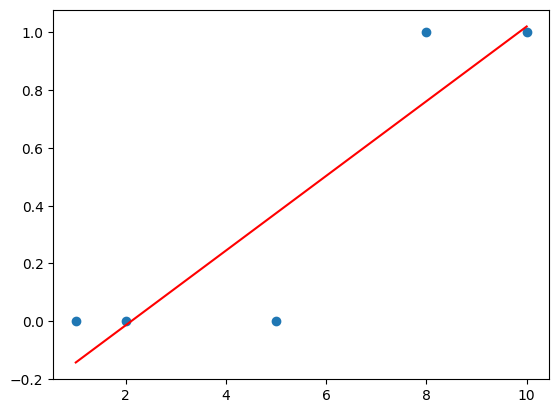

In [234]:
x = np.array([1,2,5,8,10])
y = np.array([0,0,0,1,1]) # 실제값
from scipy import stats
lm = stats.linregress(x,y) # 기울기(W)와 y절편(b)
H = lm[0]*x + lm[1]
import matplotlib.pyplot as plt
plt.plot(x, H, 'r')
plt.scatter(x,y)

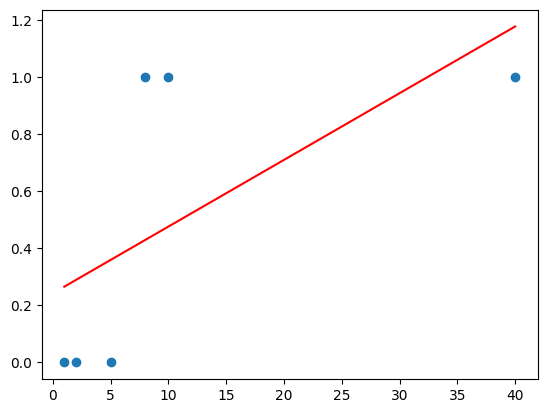

In [235]:
x = np.array([1,2,5,8,10,40])
y = np.array([0,0,0,1,1,1]) # 실제값
from scipy import stats
lm = stats.linregress(x,y) # 기울기(W)와 y절편(b)
H = lm[0]*x + lm[1]
import matplotlib.pyplot as plt
plt.plot(x, H, 'r')
plt.scatter(x,y)